In [2]:
# Calculate Mean
def mean(numbers):
    return sum(numbers) / len(numbers)

In [3]:
mean([10,20,30,8,56,89])

35.5

In [4]:
# Calculate Variance
def variance(numbers):
    mean_value = mean(numbers)
    squared_diffs = [(x - mean_value) ** 2 for x in numbers]
    return sum(squared_diffs) / len(numbers)

In [5]:
variance([10,20,30,8,56,89])

826.5833333333334

In [6]:
# Calculate Standard deviation
import math

def standard_deviation(numbers):
    return math.sqrt(variance(numbers))


In [7]:
standard_deviation([10,20,30,8,56,89])

28.750362316557567

In [8]:
#Calculate Mean Absolute Deviation
def mean_absolute_deviation(numbers):
    mean_value = mean(numbers)
    mean_diff = [abs(x - mean_value) for x in numbers]
    return sum(mean_diff) / len(numbers)


In [9]:
mean_absolute_deviation([10,20,30,8,56,89])

24.666666666666668

In [10]:
#IQR-Q3-Q1
#Q3-->75th percent data value 
#Q1--->25th percent data value

In [11]:
def calculate_quartiles(data):
    # Step 1: Sort the data
    data.sort()

    # Helper function to find percentile
    def find_percentile(sorted_data, percentile):
        n = len(sorted_data)
        # Calculate the rank (index) based on percentile
        rank = (percentile / 100) * (n - 1)
        lower_index = int(rank)
        upper_index = lower_index + 1
        # If the rank is not an integer, interpolate between the two nearest data points
        if upper_index < n:
            fractional_part = rank - lower_index
            return sorted_data[lower_index] + fractional_part * (sorted_data[upper_index] - sorted_data[lower_index])
        else:
            return sorted_data[lower_index]

    # Step 2: Calculate Q1, Q2, Q3, and Q4
    Q1 = find_percentile(data, 25)  # 25th percentile
    Q2 = find_percentile(data, 50)  # 50th percentile (median)
    Q3 = find_percentile(data, 75)  # 75th percentile
    Q4 = find_percentile(data, 100)  # 100th percentile (max)

    return Q1, Q2, Q3, Q4

# Example usage
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
Q1, Q2, Q3, Q4 = calculate_quartiles(data)
print(f"Q1: {Q1}, Q2 (Median): {Q2}, Q3: {Q3}, Q4 (Max): {Q4}")


Q1: 32.5, Q2 (Median): 55.0, Q3: 77.5, Q4 (Max): 100


In [12]:
#Interquartile Range (IQR): The difference between the third quartile (Q3) and the first quartile (Q1):
#Q3-Q1
#Lower Fence: Any value below this fence is considered a potential outlier:
#Lower Fence=Q1−1.5×IQR
#Upper Fence: Any value above this fence is considered a potential outlier:
#Upper Fence=Q3+1.5×IQR

def calculate_fences(data):
    Q1, Q2, Q3,Q4 = calculate_quartiles(data)
    IQR = Q3 - Q1
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    return lower_fence, upper_fence

In [13]:
l,u=calculate_fences(data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
#Any values below -35.0 or above 145.0 would be considered potential outliers in this dataset.
#left skewed:- Mean<Median
#right skewed:- Median<Mean

In [14]:
l

-35.0

In [15]:
u

145.0

In [16]:
l1,u1=data = calculate_fences([50, 52, 53, 54, 55, 56, 58, 60, 62, 64, 68, 75])


In [17]:
l1

40.625

In [18]:
u1

75.625

In [19]:
standard_deviation([20,15,26,32,18,28,35,14,26,22,17])

6.6332495807108

In [20]:
mean([20,15,26,32,18,28,35,14,26,22,17])

23.0

In [21]:
def z_score(numbers):
    std=standard_deviation(numbers)
    x=mean(numbers)
    return [(i-x)/std for i in numbers]

In [22]:
z_score([20,15,26,32,18,28,35,14,26,22,17])

[-0.45226701686664544,
 -1.2060453783110545,
 0.45226701686664544,
 1.3568010505999364,
 -0.753778361444409,
 0.753778361444409,
 1.8090680674665818,
 -1.3568010505999364,
 0.45226701686664544,
 -0.15075567228888181,
 -0.9045340337332909]

In [2]:
import pandas as pd

tit_data=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-CompleteGuide/refs/heads/main/Titanic.csv")

                     

In [3]:
tit_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
import matplotlib.pyplot as plt
import numpy as np
x=np.linspace(0,10,100)

In [5]:
x

array([ 0.        ,  0.1010101 ,  0.2020202 ,  0.3030303 ,  0.4040404 ,
        0.50505051,  0.60606061,  0.70707071,  0.80808081,  0.90909091,
        1.01010101,  1.11111111,  1.21212121,  1.31313131,  1.41414141,
        1.51515152,  1.61616162,  1.71717172,  1.81818182,  1.91919192,
        2.02020202,  2.12121212,  2.22222222,  2.32323232,  2.42424242,
        2.52525253,  2.62626263,  2.72727273,  2.82828283,  2.92929293,
        3.03030303,  3.13131313,  3.23232323,  3.33333333,  3.43434343,
        3.53535354,  3.63636364,  3.73737374,  3.83838384,  3.93939394,
        4.04040404,  4.14141414,  4.24242424,  4.34343434,  4.44444444,
        4.54545455,  4.64646465,  4.74747475,  4.84848485,  4.94949495,
        5.05050505,  5.15151515,  5.25252525,  5.35353535,  5.45454545,
        5.55555556,  5.65656566,  5.75757576,  5.85858586,  5.95959596,
        6.06060606,  6.16161616,  6.26262626,  6.36363636,  6.46464646,
        6.56565657,  6.66666667,  6.76767677,  6.86868687,  6.96

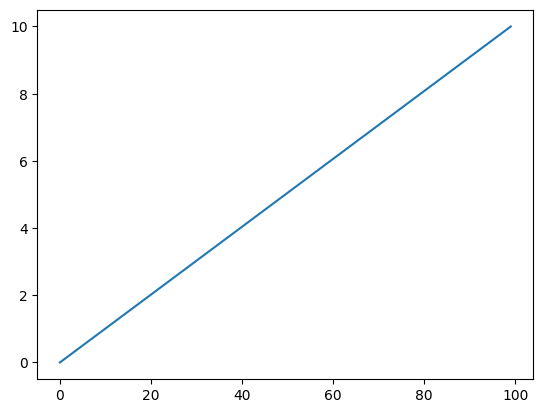

In [6]:
plt.plot(x)

In [8]:
y=np.sin(x)

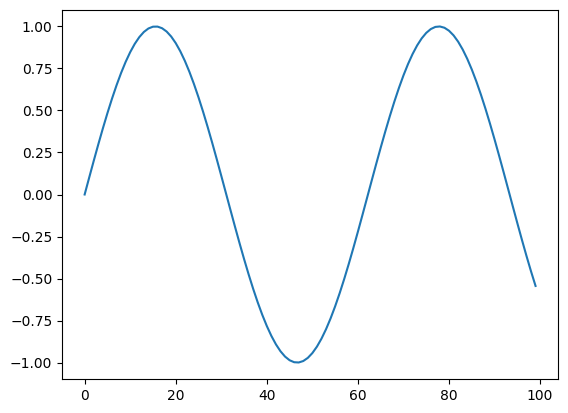

In [9]:
plt.plot(y)

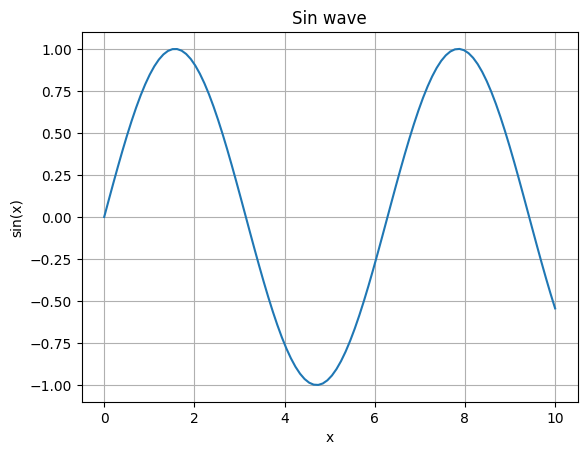

In [13]:
fig,ax=plt.subplots()
ax.plot(x,y)
ax.set(xlabel='x',ylabel='sin(x)', title='Sin wave')
ax.grid()
plt.show()

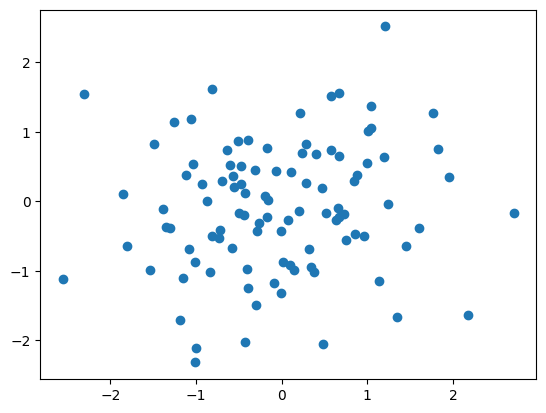

In [15]:
x=np.random.randn(100)
y=np.random.randn(100)
plt.scatter(x,y)


In [5]:
 custom_data=[10,12,23,24,32,45,67,45,56,32,28]

In [6]:
cdc=custom_data.copy()
cdc

[10, 12, 23, 24, 32, 45, 67, 45, 56, 32, 28]

C:\Users\MSA63\AppData\Local\Temp\ipykernel_5664\2919093192.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cdc)


<Axes: ylabel='Density'>

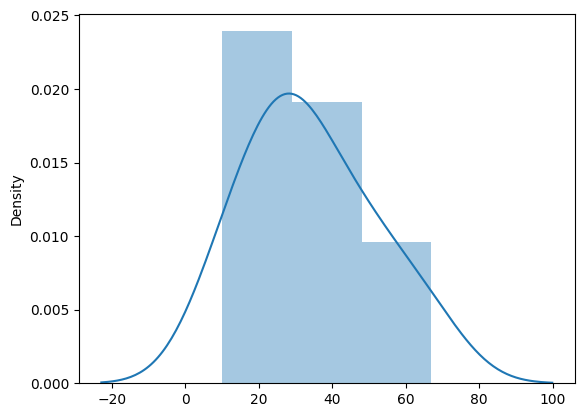

In [7]:
import seaborn as sns
sns.distplot(cdc)

<Axes: ylabel='Count'>

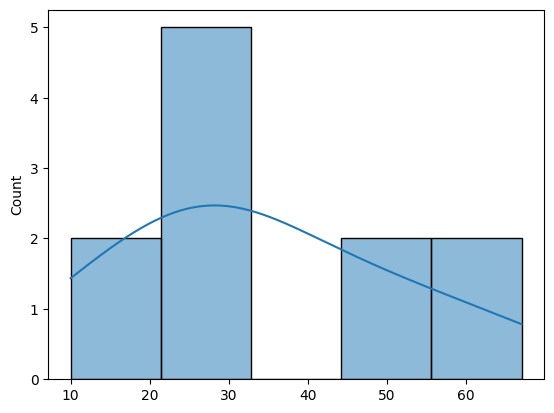

In [10]:
sns.histplot(cdc, kde=True)

In [11]:
import pandas as pd
data=pd.read_csv("https://raw.githubusercontent.com/sunnysavita10/Statistics-With-Python-CompleteGuide/refs/heads/main/Iris.csv")
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


<Axes: xlabel='SepalLengthCm', ylabel='Count'>

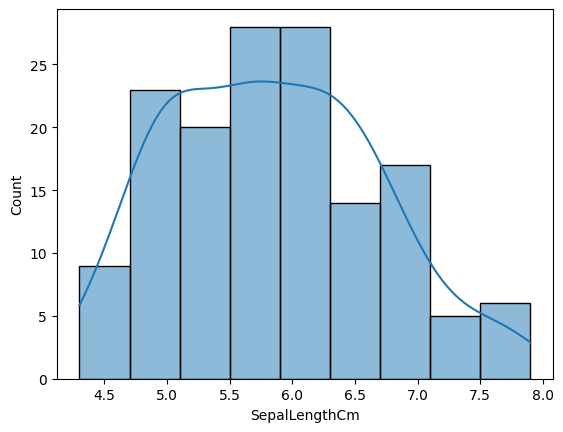

In [13]:
sns.histplot(data["SepalLengthCm"],kde=True)

<Axes: xlabel='SepalWidthCm', ylabel='Count'>

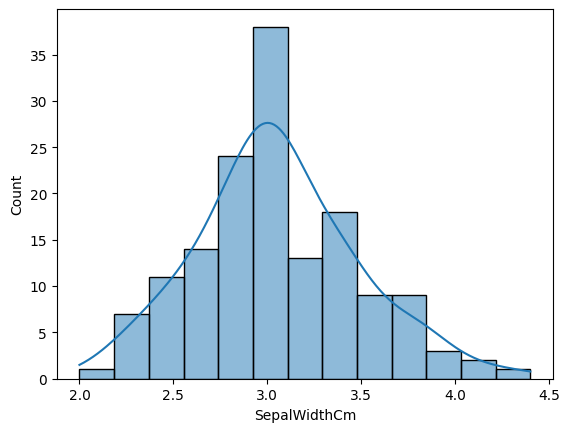

In [14]:
sns.histplot(data["SepalWidthCm"],kde=True)

<Axes: xlabel='PetalLengthCm', ylabel='Count'>

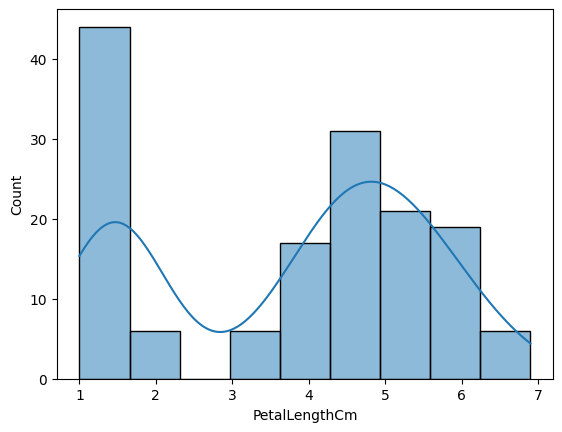

In [15]:
sns.histplot(data["PetalLengthCm"],kde=True)

In [16]:
import numpy as np
s=np.random.normal(0.5,0.2,1000)

<Axes: ylabel='Count'>

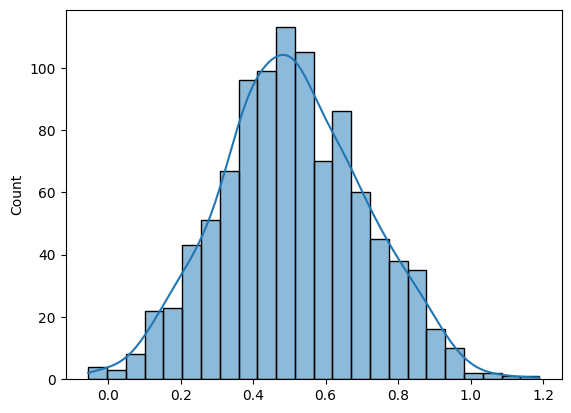

In [17]:
sns.histplot(s,kde=True)

In [21]:
s1=np.random.lognormal(0.3,0.1,10000)

C:\Users\MSA63\AppData\Local\Temp\ipykernel_5664\4058220423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(s1)


<Axes: ylabel='Density'>

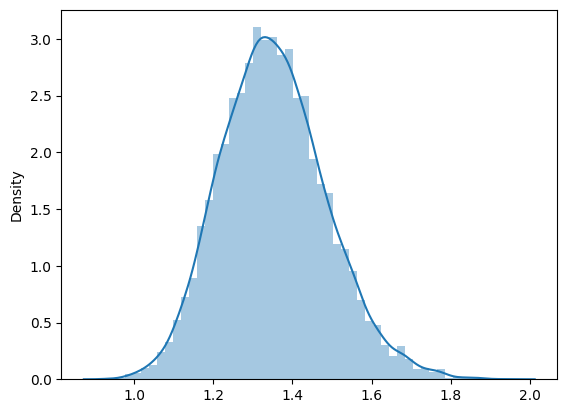

In [22]:
sns.distplot(s1)

In [23]:
import matplotlib as plt
import scipy.stats as stat
import pylab

In [24]:
def plot_data(sample):
    plt.figure(figsize=(10,8))
    plt.subplot(1,2,1)
    sns.histplot(sample, kde=True)
    plt.subplot(1,2,2)
    stat.probplot(sample, dist="norm",plot=pylab)
    plt.show()

In [25]:
pip list

Package                   Version
------------------------- --------------
anyio                     4.4.0
appdirs                   1.4.4
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 2.4.1
async-lru                 2.0.4
attrs                     24.2.0
babel                     2.16.0
beautifulsoup4            4.12.3
bleach                    6.1.0
certifi                   2024.2.2
cffi                      1.17.1
charset-normalizer        3.3.2
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.0
cycler                    0.12.1
debugpy                   1.8.5
decorator                 5.1.1
defusedxml                0.7.1
dnspython                 2.6.1
exceptiongroup            1.2.2
executing                 2.1.0
fastjsonschema            2.20.0
flexcache                 0.3
flexparser                0.3.1
fonttools                 4.53.1
fqdn               


[notice] A new release of pip available: 22.3.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
python.exe -m pip3 install --upgrade pip

SyntaxError: invalid syntax (2588156263.py, line 1)

In [28]:
pip install --upgrade pip

     ---------------------------------------- 1.8/1.8 MB 939.1 kB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 22.3.1
    Uninstalling pip-22.3.1:
      Successfully uninstalled pip-22.3.1
Note: you may need to restart the kernel to use updated packages.
